## customer-revenue-prediction

#### In this competition, you’re challenged to analyze a Google Merchandise Store (also known as GStore, where Google swag is sold) customer dataset to predict revenue per customer. Hopefully, the outcome will be more actionable operational changes and a better use of marketing budgets for those companies who choose to use data analysis on top of GA data.

### What am I predicting?
#### We are predicting the natural log of the sum of all transactions per user. Once the data is updated, as noted above, this will be for all users in test_v2.csv for December 1st, 2018 to January 31st, 2019. For every user in the test set, the target is:
#### yuser=∑i=1ntransactionuseri
#### targetuser=ln(yuser+1)
#### Note that the dataset does NOT contain data for December 1st 2018 to January 31st 2019. You must identify the unique fullVisitorIds in the provided test_v2.csv and make predictions for them for those unseen months.

### File Descriptions
#### Note: These have not yet been updated, per the "Important Note" above.

#### **train_v2.csv** - the updated training set - contains user transactions from August 1st 2016 to April 30th 2018.
#### **test_v2.csv** - the updated test set - contains user transactions from May 1st 2018 to October 15th 2018.
#### **sample_submission_v2.csv** - a updated sample submission file in the correct format. Contains all fullVisitorIds in test_v2.csv. Your submission's PredictedLogRevenue column should make forward-looking predictions for each of these fullVisitorIds for the timeframe of December 1st 2018 to January 31st 2019. Review "What am I predicting?" above for details.




### Data Fields

1- fullVisitorId- A unique identifier for each user of the Google Merchandise Store.

2- channelGrouping - The channel via which the user came to the Store.

3- date - The date on which the user visited the Store.

4- device - The specifications for the device used to access the Store.

5- geoNetwork - This section contains information about the geography of the user.

6- socialEngagementType - Engagement type, either "Socially Engaged" or "Not Socially Engaged".

7- totals - This section contains aggregate values across the session.

8- trafficSource - This section contains information about the Traffic Source from which the session originated.

9- visitId - An identifier for this session. This is part of the value usually stored as the _utmb cookie. This is only unique to the user. For a 
completely unique ID, you should use a combination of fullVisitorId and visitId.

10- visitNumber - The session number for this user. If this is the first session, then this is set to 1.

11-visitStartTime - The timestamp (expressed as POSIX time).

12- hits - This row and nested fields are populated for any and all types of hits. Provides a record of all page visits.

13- customDimensions - This section contains any user-level or session-level custom dimensions that are set for a session. This is a repeated field and has an entry for each dimension that is set.

14- totals - This set of columns mostly includes high-level aggregate data.

The 'parse' function to flatten JSON columns have been created


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.io.json import json_normalize 
import json

In [3]:
#import csv
train = pd.read_csv('./data/train.csv',engine ='python', error_bad_lines=False,parse_dates=['date'] )
#note:-
#ParserError: Error tokenizing data. C error: EOF inside string starting at line pandas
#ParserError: unexpected end of data


Skipping line 421731: unexpected end of data


#### sep defult (,) c engine doesn't read (,)
#### python engine read (,) 
#### delimiter :- Alternative argument name for sep 

In [4]:
train.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,2016-09-02,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,2016-09-02,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


## Clean Data 

In [5]:
train.shape

(421729, 12)

### **Convert visitStartTime to datatime**

In [6]:
train['visitStartTime']= pd.to_datetime(train['visitStartTime'],unit='s')

In [8]:
train.dtypes

channelGrouping                 object
date                    datetime64[ns]
device                          object
fullVisitorId                   object
geoNetwork                      object
sessionId                       object
socialEngagementType            object
totals                          object
trafficSource                   object
visitId                          int64
visitNumber                      int64
visitStartTime          datetime64[ns]
dtype: object

### change type visitId to Object

In [9]:
train['visitId']=train['visitId'].astype(str)

In [10]:
train['visitId'].dtype

dtype('O')

#### Columns json (device,geoNetwork,trafficSource,totals )
**use json_loads**

In [11]:
device = pd.DataFrame(train['device'].apply(json.loads).tolist())


In [12]:
device.head()

,browser,browserSize,browserVersion,deviceCategory,flashVersion,isMobile,language,mobileDeviceBranding,mobileDeviceInfo,mobileDeviceMarketingName,mobileDeviceModel,mobileInputSelector,operatingSystem,operatingSystemVersion,screenColors,screenResolution
0,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset
1,Firefox,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset
2,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset
3,UC Browser,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,not available in demo dataset,not available in demo dataset
4,Chrome,not available in demo dataset,not available in demo dataset,mobile,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,not available in demo dataset,not available in demo dataset


In [13]:
device.columns

Index(['browser', 'browserSize', 'browserVersion', 'deviceCategory',
       'flashVersion', 'isMobile', 'language', 'mobileDeviceBranding',
       'mobileDeviceInfo', 'mobileDeviceMarketingName', 'mobileDeviceModel',
       'mobileInputSelector', 'operatingSystem', 'operatingSystemVersion',
       'screenColors', 'screenResolution'],
      dtype='object')

In [14]:
device['mobileDeviceInfo'].value_counts().index.unique()

Index(['not available in demo dataset'], dtype='object')

In [15]:
del device['browserSize']

In [16]:
del device['browserVersion']
del device['flashVersion']
del device['language']
del device['mobileDeviceBranding']
del device['mobileDeviceInfo']
del device['mobileDeviceMarketingName']
del device['mobileDeviceModel']
del device['mobileInputSelector']
del device['operatingSystemVersion']
del device['screenColors']
del device['screenResolution']

In [17]:
device.head()

,browser,deviceCategory,isMobile,operatingSystem
0,Chrome,desktop,False,Windows
1,Firefox,desktop,False,Macintosh
2,Chrome,desktop,False,Windows
3,UC Browser,desktop,False,Linux
4,Chrome,mobile,True,Android


In [18]:
device['deviceCategory'].value_counts()

desktop    314662
mobile      93252
tablet      13815
Name: deviceCategory, dtype: int64

In [19]:
names = device['deviceCategory'].value_counts().index.tolist()
names

['desktop', 'mobile', 'tablet']

In [20]:
values = device['deviceCategory'].value_counts().tolist()
values

[314662, 93252, 13815]

Text(0,0.5,'Values_Categories')

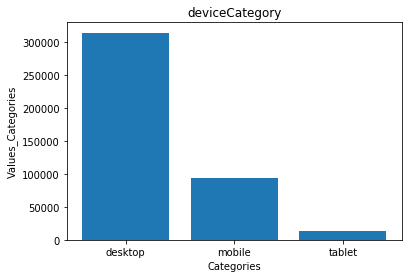

In [21]:
plt.bar(names,values)
plt.title('deviceCategory')
plt.xlabel('Categories')
plt.ylabel('Values_Categories')



### <span style="color:red"> The Desktop is Widely used by the users.</span>

### device category:- **desktopcategory** is max value and ***tablet*** is min  

### **OperatingSystem**

In [22]:
device['operatingSystem'].value_counts().index.tolist()

['Windows',
 'Macintosh',
 'Android',
 'iOS',
 'Linux',
 'Chrome OS',
 '(not set)',
 'Windows Phone',
 'Samsung',
 'BlackBerry',
 'Nintendo Wii',
 'Firefox OS',
 'Xbox',
 'Nintendo WiiU',
 'FreeBSD',
 'Nokia',
 'NTT DoCoMo']

In [23]:
bro_v = device.loc[(device['browser'] == 'Chrome') &(device['isMobile'] == False),'browser'].value_counts().tolist()
print('Max',device['browser'].value_counts().max())
print('mean',device['browser'].value_counts().mean())
print('mode',device['browser'].mode())
print('min',device['browser'].value_counts().min())
print('sum',device['browser'].value_counts().sum())
print('per:Chrome:- ',(device['browser'].value_counts().max())/(device['browser'].value_counts().sum())* 100 ,'%')



Max 288480
mean 8972.95744680851
mode 0    Chrome
dtype: object
min 1
sum 421729
per:Chrome:-  68.40411733601435 %


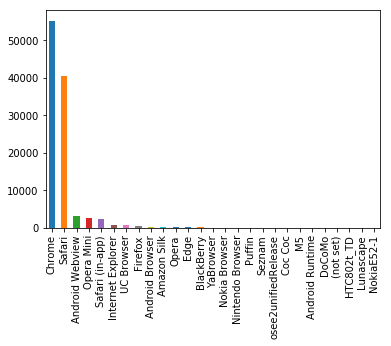

In [24]:
device.loc[device['isMobile'] == True,'browser'].value_counts().plot.bar()

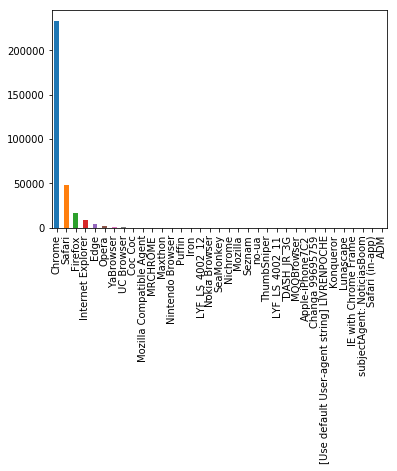

In [25]:
#(device.loc[device['isMobile'] == False,'browser'].value_counts()/len(device['browser'])).plot.bar()
#device.loc[device['isMobile'] == False,'browser'].value_counts().sort_values(ascending=False).plot.bar()
device.loc[device['isMobile'] == False,'browser'].value_counts().plot.bar()


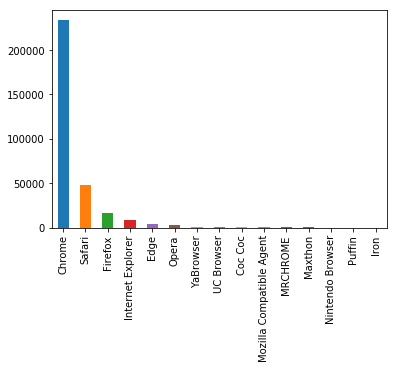

In [32]:
device.loc[device['isMobile'] == False,'browser'].value_counts().sort_values(ascending=False).head(15).plot.bar()


## Chrome is Widely used by the users 
#### Chrome , Safari, Firefox ,Internet Explorer , Edge and Opera 

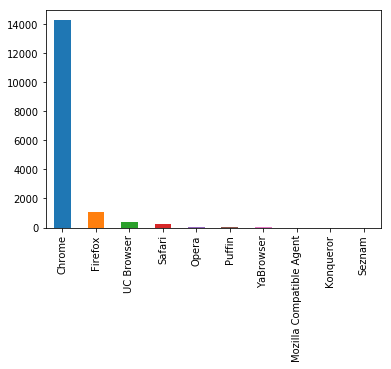

In [34]:
device.loc[(device['isMobile'] == False) & (device['operatingSystem'] == 'Linux'),'browser'].value_counts().head(15).sort_values(ascending=False).plot.bar()


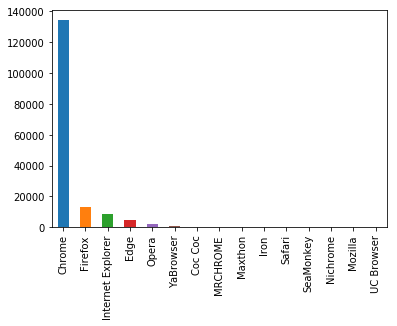

In [35]:
device.loc[(device['isMobile'] == False) & (device['operatingSystem'] == 'Windows'),'browser'].value_counts().head(15).sort_values(ascending=False).plot.bar()


In [36]:
device.loc[(device['isMobile'] == False) ,'operatingSystem'].value_counts().index.tolist()


['Windows',
 'Macintosh',
 'Linux',
 'Chrome OS',
 '(not set)',
 'Nintendo Wii',
 'Xbox',
 'iOS',
 'FreeBSD']

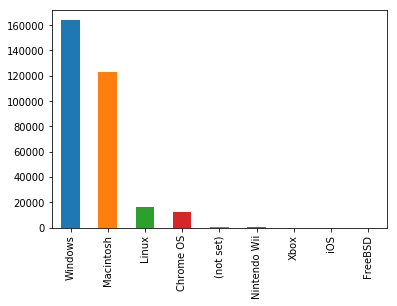

In [37]:
device.loc[(device['isMobile'] == False) ,'operatingSystem'].value_counts().sort_values(ascending=False).plot.bar()


In [39]:
device.loc[(device['isMobile'] == True) ,'operatingSystem'].value_counts().index.tolist()


['Android',
 'iOS',
 '(not set)',
 'Windows',
 'Windows Phone',
 'Samsung',
 'BlackBerry',
 'Firefox OS',
 'Nintendo WiiU',
 'Linux',
 'Macintosh',
 'NTT DoCoMo',
 'Nokia']

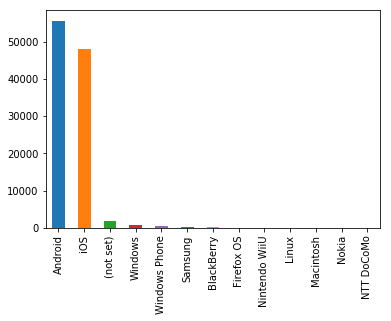

In [38]:
device.loc[(device['isMobile'] == True) ,'operatingSystem'].value_counts().sort_values(ascending=False).plot.bar()


In [ ]:
geoNetwork = pd.DataFrame(train['geoNetwork'].apply(json.loads).tolist())
trafficSource = pd.DataFrame(train['trafficSource'].apply(json.loads).tolist())
totals = pd.DataFrame(train['totals'].apply(json.loads).tolist())


In [ ]:
geoNetwork.head()

In [ ]:
trafficSource.head()

In [ ]:
trafficSource['adwordsClickInfo'].head()
#adwordsClickInfo = pd.DataFrame(trafficSource['adwordsClickInfo'].apply(json.loads).tolist())
#adwordsClickInfo.head()

In [46]:
train['fullVisitorId']= train['fullVisitorId'].astype(str)

In [47]:
train['fullVisitorId'].dtype

dtype('O')

In [50]:
train['fullVisitorId'].value_counts()

1957458976293878100    130
0824839726118485274    125
1856749147915772585     93
3269834865385146569     87
3608475193341679870     86
7634897085866546110     74
6254908847172458133     67
2194592743396253647     65
0720311197761340948     64
4038076683036146727     64
0232377434237234751     58
0949718915643445721     57
9801276214964695322     55
3148617623907142276     54
7813149961404844386     48
6588500311054802771     48
3525537916960843419     46
2082625651279391786     46
9609104828919391966     45
6018775317735347795     43
3694234028523165868     42
6530882759032993025     42
0678102787097322550     41
7498695963354635199     41
4913801338365738862     41
7445235885559107095     40
5208937953046059083     39
3041133261614133977     37
9320456289108916892     36
9534537897118577344     35
                      ... 
3004237528141135396      1
2315881280423593743      1
0317166849977517221      1
473006930425804010       1
6593108260716161305      1
1465898274715296892      1
0

In [73]:
print('Max',train['fullVisitorId'].value_counts().max())
print('Max_index',train['fullVisitorId'].value_counts().index.max())

print('Mean',train['fullVisitorId'].value_counts().mean())
print('Min',train['fullVisitorId'].value_counts().min())
print('Mode_Value',train['fullVisitorId'].value_counts().mode())


Max 130
Max_index 9999986437109498564
Mean 1.1897922450177172
Min 1
Mode_Value 0    1
dtype: int64


In [ ]:
train[train['fullVisitorId']]